# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [41]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
get_ipython().run_line_magic("matplotlib", "inline")
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\taylo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [42]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [43]:
# Fetch the Bitcoin news articles
Bitcoin = newsapi.get_everything(q="BTC",language="en",sort_by="relevancy")
# Show the total number of news
Bitcoin["totalResults"]


1552

In [44]:
# Fetch the Ethereum news articles
Ethereum = newsapi.get_everything(q="ETH",language="en",sort_by="relevancy")
# Show the total number of news
Ethereum["totalResults"]


1001

In [45]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [47]:
# Create function to seperate articles into readible dataframes with the scores already joined 
# Sentiment calculation based on compound score
def create_df(news):
    articles = []
    analyzer = SentimentIntensityAnalyzer()
    for article in news:
        try:
            date = article["publishedAt"][:10]
            text = article["content"]
            title = article["title"]
            description = article["description"]

            sentiment_text = analyzer.polarity_scores(text)
            comp_text = sentiment_text["compound"]
            pos_text = sentiment_text["pos"]
            neu_text= sentiment_text["neu"]
            neg_text = sentiment_text["neg"]
            text_score_std=(get_sentiment(sentiment_text["compound"]))
            sentiment_title = analyzer.polarity_scores(title)
            comp_title = sentiment_title["compound"]
            pos_title = sentiment_title["pos"]
            neu_title= sentiment_title["neu"]
            neg_title= sentiment_title["neg"]
            title_score_std=(get_sentiment(sentiment_title["compound"]))

            sentiment_description = analyzer.polarity_scores(description)
            comp_description = sentiment_description["compound"]
            pos_description = sentiment_description["pos"]
            neu_description= sentiment_description["neu"]
            neg_description = sentiment_description["neg"]
            description_score_std=(get_sentiment(sentiment_description["compound"]))

            articles.append({
                "Date": date,
                "Title": title,
                "Title Compound" : comp_title,
                "Title Positive": pos_title,
                "Title Negative": neg_title,
                "Title Neutral": neu_title,
                "Title Score Standard" : title_score_std,               
                "Description": description,
                "Description Compound" : comp_description,
                "Description Positive": pos_description,
                "Description Negative": neg_description,
                "Description Neutral": neu_description,
                "Description Score Standard" : description_score_std,
                "Text": text,
                "Text Compound" : comp_text,
                "Text Positive": pos_text,
                "Text Negative": neg_text,
                "Text Neutral": neu_text,
                "Text Score Standard" : text_score_std})
        except AttributeError:
                pass
    return pd.DataFrame(articles)

In [48]:
# Create DataFrame
#columns='Date,Title,Title Score Standard,Description,Description Score Standard,Text,Text Score Standard'
bitcoin_df = create_df(Bitcoin["articles"])
bitcoin_df_short=bitcoin_df['Description']

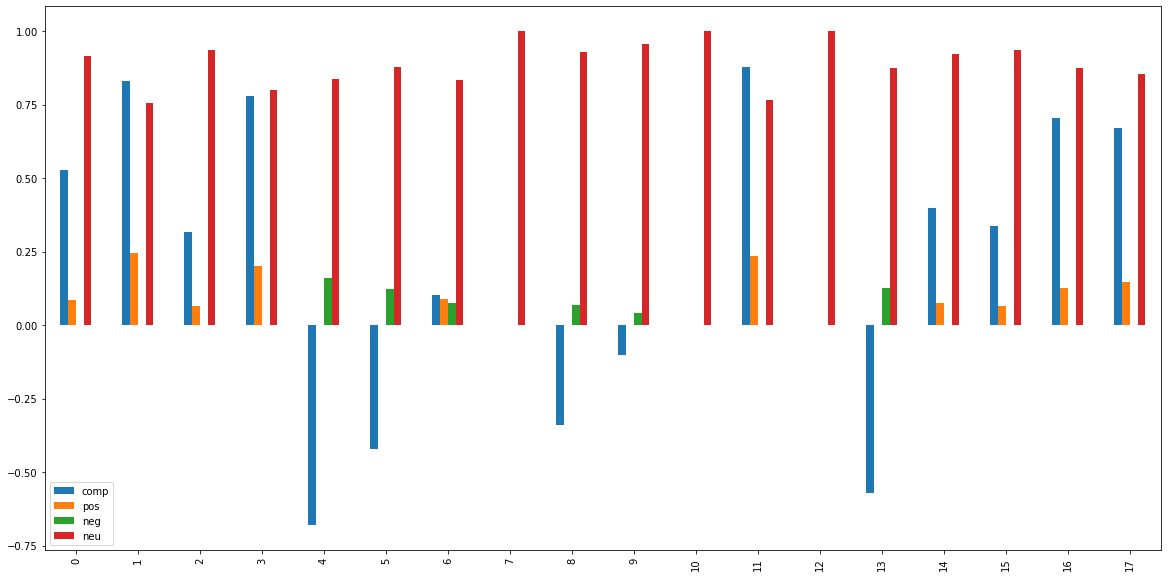

In [49]:

# Create the Ethereum sentiment scores 
ethereum_df = create_df(Ethereum["articles"])
ethereum_df_short=ethereum_df['Description']


In [50]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Title Compound,Title Positive,Title Negative,Title Neutral,Title Score Standard,Description Compound,Description Positive,Description Negative,Description Neutral,Description Score Standard,Text Compound,Text Positive,Text Negative,Text Neutral,Text Score Standard
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,0.097260,0.118450,0.057700,0.82385,0.100000,0.277065,0.104800,0.032950,0.862200,0.500000,0.200040,0.066750,0.023650,0.90955,0.300000
std,0.440385,0.159212,0.123047,0.17214,0.788069,0.392135,0.103465,0.054115,0.116482,0.760886,0.437893,0.083836,0.047366,0.08171,0.801315
min,-0.690800,0.000000,0.000000,0.51500,-1.000000,-0.440400,0.000000,0.000000,0.608000,-1.000000,-0.680800,0.000000,0.000000,0.75400,-1.000000
25%,-0.038275,0.000000,0.000000,0.67900,-0.250000,0.000000,0.040500,0.000000,0.773500,0.000000,0.000000,0.000000,0.000000,0.84925,0.000000
50%,0.000000,0.024000,0.000000,0.85450,0.000000,0.306700,0.067500,0.000000,0.891500,1.000000,0.051350,0.032000,0.000000,0.92650,0.500000
75%,0.432825,0.245000,0.030250,1.00000,1.000000,0.511725,0.138000,0.049750,0.944500,1.000000,0.562650,0.098750,0.010500,1.00000,1.000000
max,0.822500,0.462000,0.485000,1.00000,1.000000,0.931300,0.392000,0.172000,1.000000,1.000000,0.877900,0.246000,0.162000,1.00000,1.000000


In [51]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Title Compound,Title Positive,Title Negative,Title Neutral,Title Score Standard,Description Compound,Description Positive,Description Negative,Description Neutral,Description Score Standard,Text Compound,Text Positive,Text Negative,Text Neutral,Text Score Standard
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.011670,0.041900,0.035250,0.922850,0.000000,0.211200,0.067700,0.013600,0.918600,0.400000,0.238805,0.067150,0.011950,0.920900,0.350000
std,0.303652,0.108293,0.088087,0.127974,0.561951,0.286801,0.090621,0.031969,0.089591,0.753937,0.369174,0.076801,0.024778,0.069448,0.812728
min,-0.624900,0.000000,0.000000,0.605000,-1.000000,-0.226300,0.000000,0.000000,0.608000,-1.000000,-0.340000,0.000000,0.000000,0.753000,-1.000000
25%,0.000000,0.000000,0.000000,0.828000,0.000000,0.000000,0.000000,0.000000,0.891000,0.000000,0.000000,0.000000,0.000000,0.902500,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.273000,0.060500,0.000000,0.923000,1.000000,0.339700,0.067500,0.000000,0.930000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.361200,0.094000,0.000000,1.000000,1.000000,0.465875,0.097500,0.000000,0.962500,1.000000
max,0.817600,0.395000,0.279000,1.000000,1.000000,0.784500,0.392000,0.122000,1.000000,1.000000,0.802000,0.247000,0.070000,1.000000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [39]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(article):
    # Create a list of stopwords
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z]")    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    words= [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

In [70]:
# Create a new tokens column for Bitcoin
bitcoin_list=[]
for x in bitcoin_df['Description']:
    bitcoin_list.append(clean_text(x))
bitcoin_df['Tokens']=bitcoin_list

In [73]:
# Create a new tokens column for Ethereum
ethereum_list=[]
for x in ethereum_df['Description']:
    ethereum_list.append(clean_text(x))
ethereum_df['Tokens']=ethereum_list       


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [74]:
from collections import Counter
from nltk import ngrams

In [76]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [88]:
# Generate the Bitcoin N-grams where N=2
bitgrams=[]
topbtc=[]
for x in bitcoin_df.Tokens:    
    bitcoin_ngram = Counter(ngrams(x, n=2))
    topbtc.append(token_count(x,N=10))
    bitgrams.append(bitcoin_ngram)
bitgrams

[Counter({('fifteen', 'years'): 1,
          ('years', 'twitter'): 1,
          ('twitter', 'ceo'): 1,
          ('ceo', 'jack'): 1,
          ('jack', 'dorsey'): 1,
          ('dorsey', 'sent'): 1,
          ('sent', 'worlds'): 1,
          ('worlds', 'first'): 1,
          ('first', 'tweet'): 1,
          ('tweet', 'message'): 1,
          ('message', 'sold'): 1,
          ('sold', 'nearly'): 1,
          ('nearly', 'million'): 1,
          ('million', 'nft'): 1}),
 Counter({('tldr', 'enter'): 1,
          ('enter', 'complete'): 1,
          ('complete', 'bitcoin'): 1,
          ('bitcoin', 'btc'): 1,
          ('btc', 'investment'): 1,
          ('investment', 'giveaway'): 2,
          ('giveaway', 'chance'): 1,
          ('chance', 'win'): 1,
          ('win', 'cryptocurrencyrelated'): 1,
          ('cryptocurrencyrelated', 'prizesthe'): 1,
          ('prizesthe', 'bitcoin'): 1,
          ('bitcoin', 'investment'): 1,
          ('giveaway', 'includes'): 1,
          ('includes', 'e

In [78]:
# Generate the Ethereum N-grams where N=2
ethgrams=[]
topeth=[]
for x in ethereum_df.Tokens:    
    ethcoin_ngram = Counter(ngrams(x, n=2))
    topeth.append(token_count(x,N=10))
    ethgrams.append(ethcoin_ngram)

In [79]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [99]:
#  get the top 10 words for Bitcoin
topbtc

[[('fifteen', 1),
  ('years', 1),
  ('twitter', 1),
  ('ceo', 1),
  ('jack', 1),
  ('dorsey', 1),
  ('sent', 1),
  ('worlds', 1),
  ('first', 1),
  ('tweet', 1)],
 [('bitcoin', 2),
  ('investment', 2),
  ('giveaway', 2),
  ('tldr', 1),
  ('enter', 1),
  ('complete', 1),
  ('btc', 1),
  ('chance', 1),
  ('win', 1),
  ('cryptocurrencyrelated', 1)],
 [('tesla', 3),
  ('elon', 2),
  ('musk', 2),
  ('inevitable', 1),
  ('happened', 1),
  ('purchase', 1),
  ('vehicle', 1),
  ('bitcointhis', 1),
  ('according', 1),
  ('ceo', 1)],
 [('heres', 1),
  ('chance', 1),
  ('win', 1),
  ('big', 1),
  ('world', 1),
  ('cryptocurrency', 1)],
 [('burry', 1),
  ('compared', 1),
  ('boom', 1),
  ('bitcoin', 1),
  ('electric', 1),
  ('vehicles', 1),
  ('meme', 1),
  ('stocks', 1),
  ('dotcom', 1),
  ('housing', 1)],
 [('bitcoin', 2),
  ('summary', 1),
  ('list', 1),
  ('placementullimichael', 1),
  ('burry', 1),
  ('says', 1),
  ('governments', 1),
  ('could', 1),
  ('handicap', 1),
  ('protect', 1)],
 [('u

In [83]:
# Use token_count to get the top 10 words for Ethereum
topeth

[[('digital', 1),
  ('content', 1),
  ('value', 1),
  ('crypto', 1),
  ('collectors', 1),
  ('flocking', 1),
  ('lay', 1),
  ('namesake', 1),
  ('biggest', 1),
  ('collections', 1)],
 [('tesla', 3),
  ('elon', 2),
  ('musk', 2),
  ('inevitable', 1),
  ('happened', 1),
  ('purchase', 1),
  ('vehicle', 1),
  ('bitcointhis', 1),
  ('according', 1),
  ('ceo', 1)],
 [('wood', 2),
  ('fahrbotbot', 1),
  ('shares', 1),
  ('report', 1),
  ('electrek', 1),
  ('researchers', 1),
  ('eth', 1),
  ('zurich', 1),
  ('empa', 1),
  ('chemically', 1)],
 [('heres', 1),
  ('chance', 1),
  ('win', 1),
  ('big', 1),
  ('world', 1),
  ('cryptocurrency', 1)],
 [('several', 1),
  ('straightforward', 1),
  ('approaches', 1),
  ('maximizing', 1),
  ('potential', 1),
  ('decentralized', 1),
  ('finance', 1),
  ('openbanking', 1),
  ('tools', 1)],
 [('alphabets', 1),
  ('stock', 1),
  ('news', 1),
  ('page', 1),
  ('added', 1),
  ('section', 1),
  ('days', 1),
  ('prices', 1),
  ('major', 1),
  ('cryptocurrencies

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

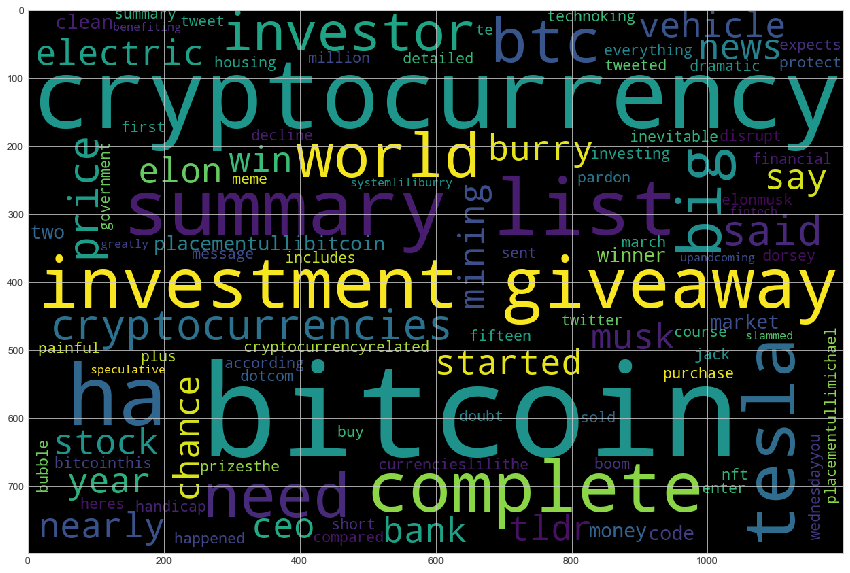

In [89]:
# Generate the Bitcoin word cloud
def wordcloudthis(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)
btc_string = ' '.join(bitcoin_df.Description)
input_text = wordcloudthis(btc_string)
wc = WordCloud(width=1200, height=800, max_words=100).generate(input_text)
plt.imshow(wc)

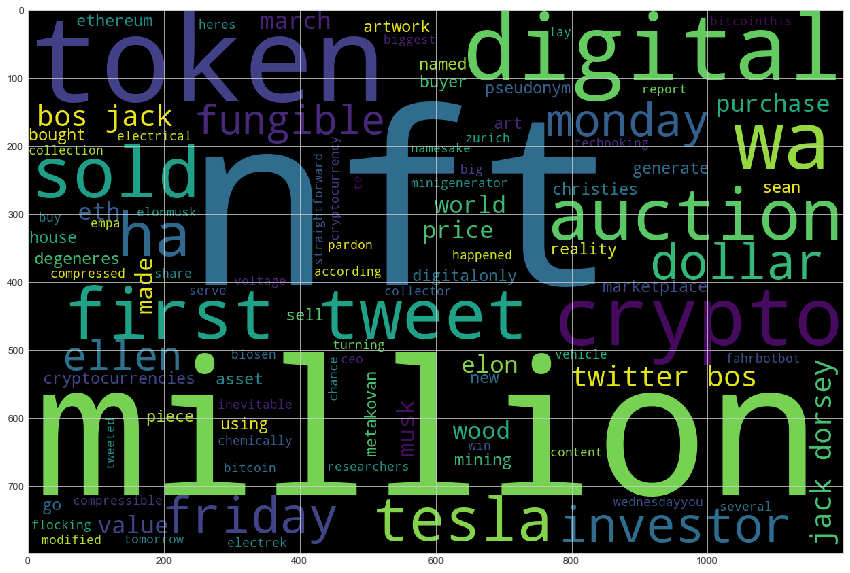

In [90]:
# Generate the Ethereum word cloud
eth_string = ' '.join(ethereum_df.Description)
input_text = wordcloudthis(eth_string)
wc = WordCloud(width=1200, height=800, max_words=100).generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [59]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [60]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [97]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

---
### Bitcoin NER

In [92]:
# Run the NER processor on all of the text
doc = nlp(btc_string)

In [93]:
# Render the visualization
displacy.render(doc, style='ent')

In [94]:
# List all Entities
show_ents(doc)

Fifteen years - DATE - Absolute or relative dates or periods
Twitter - PRODUCT - Objects, vehicles, foods, etc. (not services)
Jack Dorsey - PERSON - People, including fictional
first - ORDINAL - "first", "second", etc.
nearly $3 million - MONEY - Monetary values, including unit
NFT - ORG - Companies, agencies, institutions, etc.
over $12,000 - MONEY - Monetary values, including unit
Tesla - ORG - Companies, agencies, institutions, etc.
Elon Musk - PERSON - People, including fictional
Wednesday - DATE - Absolute or relative dates or periods
Elon Musk - PERSON - People, including fictional
March 24, 2021 - DATE - Absolute or relative dates or periods
Burry - PERSON - People, including fictional
Michael Burry - PERSON - People, including fictional
eCommerce - ORG - Companies, agencies, institutions, etc.
Alphabet - GPE - Countries, cities, states
day - DATE - Absolute or relative dates or periods
Chad Seaman Executive - ORG - Companies, agencies, institutions, etc.
Bitcoin - PERSON - Peo

---

### Ethereum NER

In [95]:
# Run the NER processor on all of the text
doc = nlp(eth_string)

# Add a title to the document
# YOUR CODE HERE!

In [96]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
# YOUR CODE HERE!

---